In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/train",
                                          target_size=(150,150),
                                          batch_size = 16,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/test",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/train'

In [3]:
validation_dataset = test.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/val",
                                          target_size=(150,150),
                                          batch_size =16,
                                          class_mode = 'binary')

Found 98 images belonging to 2 classes.


In [4]:
test_dataset.class_indices



{'Accident': 0, 'Non Accident': 1}

In [5]:
model = keras.Sequential()


model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(512,activation='relu'))


model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:

#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         steps_per_epoch = 50,
         epochs = 10,
         validation_data = validation_dataset
       
         )

Epoch 1/10
50/50 [==============================] - 339s 7s/step - loss: 0.6957 - accuracy: 0.5411 - val_loss: 0.6866 - val_accuracy: 0.5306
Epoch 2/10
50/50 [==============================] - 14s 282ms/step - loss: 0.6871 - accuracy: 0.5664 - val_loss: 0.6574 - val_accuracy: 0.5714
Epoch 3/10
50/50 [==============================] - 14s 280ms/step - loss: 0.6456 - accuracy: 0.6220 - val_loss: 0.5769 - val_accuracy: 0.6939
Epoch 4/10
50/50 [==============================] - 14s 277ms/step - loss: 0.6104 - accuracy: 0.6802 - val_loss: 0.5769 - val_accuracy: 0.7347
Epoch 5/10
50/50 [==============================] - 14s 275ms/step - loss: 0.5488 - accuracy: 0.7257 - val_loss: 0.4460 - val_accuracy: 0.8367
Epoch 6/10
50/50 [==============================] - 14s 276ms/step - loss: 0.4676 - accuracy: 0.7598 - val_loss: 0.3502 - val_accuracy: 0.8265
Epoch 7/10
50/50 [==============================] - 14s 274ms/step - loss: 0.3913 - accuracy: 0.8180 - val_loss: 0.4030 - val_accuracy: 0.7959
E

In [8]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("not accident",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("accident",fontsize=30)

1/1 [==============================] - 0s 353ms/step
[[1.]]


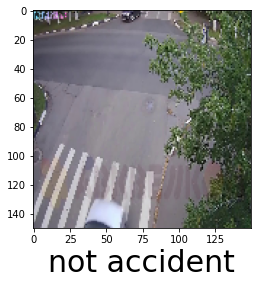

In [9]:
predictImage("/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/test/Non Accident/test19_15.jpg")

In [10]:
import cv2

In [11]:
 img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/IOT_project/ML Model/test/Non Accident/test19_15.jpg")